In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [14]:
# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<h1>Estandarización de datos</h1>
<p>Las características en el conjunto de datos pueden tener <b>diferentes escalas o unidades</b>. Por ejemplo, una característica podría estar en <b>centímetros y otra en kilogramos</b>. Si no se estandarizan, las <b>características con escalas más grandes dominarán la varianza total</b> y afectarán <b>desproporcionadamente el cálculo de los componentes principales</b>.</p>

In [17]:
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes principales
X_pca = pca.fit_transform(X_scaled)

In [19]:
# Crear un DataFrame para facilitar la visualización
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Tipo'] = y
df_pca['Label'] = df_pca['Tipo'].apply(lambda x: target_names[x])

In [20]:
df_pca.head(10)

,PC1,PC2,Tipo,Label
0,-2.264703,0.480027,0,setosa
1,-2.080961,-0.674134,0,setosa
2,-2.364229,-0.341908,0,setosa
3,-2.299384,-0.597395,0,setosa
4,-2.389842,0.646835,0,setosa
5,-2.075631,1.489178,0,setosa
6,-2.444029,0.047644,0,setosa
7,-2.232847,0.223148,0,setosa
8,-2.334640,-1.115328,0,setosa
9,-2.184328,-0.469014,0,setosa


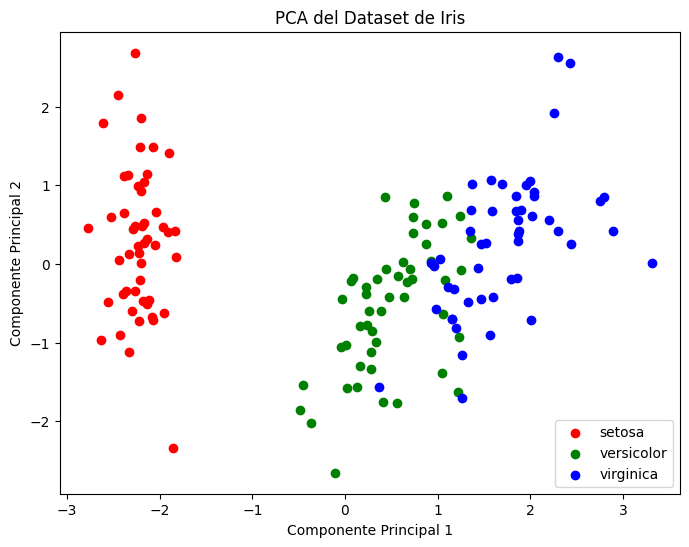

In [22]:
# Graficar los resultados
plt.figure(figsize=(8, 6))

# Crear una lista de colores para las diferentes clases
colors = ['red', 'green', 'blue']
for color, target_name in zip(colors, target_names):
    subset = df_pca[df_pca['Label'] == target_name]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, label=target_name)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA del Dataset de Iris')
plt.legend()
plt.show()

In [26]:
# Mostrar la varianza explicada por cada componente principal
print(f'La primera componente principal explica alrededor del {round(pca.explained_variance_ratio_[0]*100,2)}% de la varianza de los datos')
print(f'La segunda componente principal explica alrededor del {round(pca.explained_variance_ratio_[1]*100,2)}% de la varianza de los datos')

La primera componente principal explica alrededor del 72.96% de la varianza de los datos
La segunda componente principal explica alrededor del 22.85% de la varianza de los datos


In [32]:
# Mostrar la varianza explicada acumulada por cada componente principal
print(f'La varianza explica acumulada de ambas componentes principales es de alrededor del {round(np.cumsum(pca.explained_variance_ratio_)[1]*100,2)}%')

La varianza explica acumulada de ambas componentes principales es de alrededor del 95.81%
